In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('train_V2.csv')
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
df = df.drop(['Id','groupId','matchId'],axis = 1)

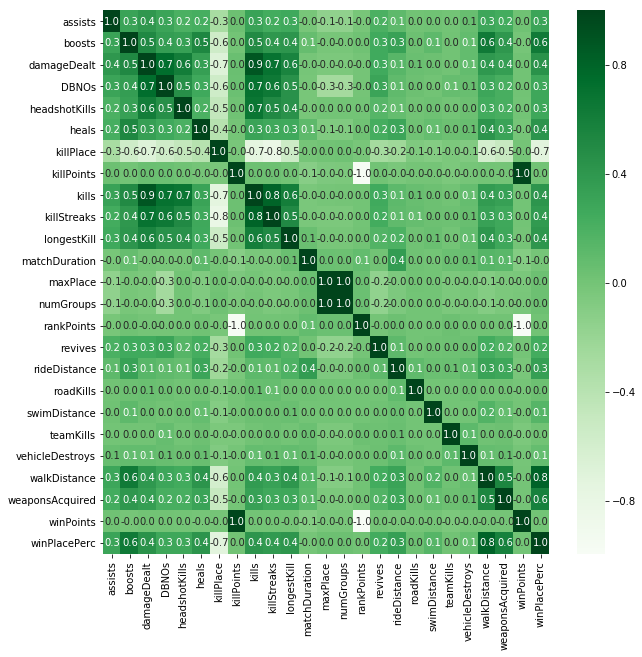

In [4]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(df.corr(),annot = True, fmt = '.1f',cmap = 'Greens')

In [5]:
feature_df = df[['boosts','damageDealt','heals','kills','killStreaks','longestKill',\
                 'killPlace','walkDistance','weaponsAcquired']]
winPerc_df = df['winPlacePerc']
feature_df.head()

,boosts,damageDealt,heals,kills,killStreaks,longestKill,killPlace,walkDistance,weaponsAcquired
0,0,0.00,0,0,0,0.00,60,244.80,1
1,0,91.47,0,0,0,0.00,57,1434.00,5
2,0,68.00,0,0,0,0.00,47,161.80,2
3,0,32.90,0,0,0,0.00,75,202.70,3
4,0,100.00,0,1,1,58.53,45,49.75,2


In [6]:
feature = feature_df.iloc[:,:].values
winPerc = winPerc_df.iloc[:,:].values

In [7]:
print(winPerc)

[0.4444 0.64   0.7755 ... 0.6522 0.1071 0.2553]


In [15]:
from sklearn.decomposition import PCA
np.set_printoptions(threshold=np.inf)
pca = PCA(n_components=2)
feature_embedded = pca.fit_transform(feature)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
reg = LinearRegression().fit(feature, winPerc)
pred = reg.predict(feature)
err = 0
for i in range(len(pred)):
    err += (pred[i] - winPerc[i])*(pred[i] - winPerc[i])
err = np.sqrt(err / len(pred))
print(err)

0.13413887679915346


In [26]:
regr = RandomForestRegressor(max_depth=2, random_state=2, n_estimators=2000)
regr.fit(feature_embedded,winPerc)
pred = regr.predict(feature_embedded)
err = 0
for i in range(len(pred)):
    err += (pred[i] - winPerc[i])*(pred[i] - winPerc[i])
err = np.sqrt(err / len(pred))
print(err)

0.151954839584036


In [ ]:
##############################################
#import lightgbm as lgb

#reg = lgb.LGBMRegressor()
#reg.fit(feature_embedded,winPerc)
#pred = reg.predict(feature_embedded, num_iteration=reg.best_iteration_)
#err = 0
#for i in range(len(pred)):
#    err += (pred[i] - winPerc[i])*(pred[i] - winPerc[i])
#err = err / len(pred)
#print(err)